In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Set the data
# We'll parse the dates for answering the 2nd question
df = pd.read_csv('Speed_Camera_Violations.csv', parse_dates=['VIOLATION DATE'])
# Get a taste of the data
df

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,2014-07-08,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,2014-07-16,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,2014-07-08,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,2014-07-26,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,2014-07-27,92,NaN,NaN,NaN,NaN,NaN
5,5529 S WESTERN,CHI068,2014-08-03,20,NaN,NaN,NaN,NaN,NaN
6,1111 N HUMBOLDT,CHI010,2014-07-30,66,NaN,NaN,NaN,NaN,NaN
7,5520 S WESTERN,CHI069,2014-07-28,18,NaN,NaN,NaN,NaN,NaN
8,5520 S WESTERN,CHI069,2014-07-16,17,NaN,NaN,NaN,NaN,NaN
9,5520 S WESTERN,CHI069,2014-07-24,11,NaN,NaN,NaN,NaN,NaN


### What the variables mean
| Variable | Definition |
| :--- | :--- |
| ADDRESS | Address of the location of the speed enforcement camera(s). There may be more than one camera at each address.|
| CAMERA ID | A unique ID associated with the physical camera at each location. There may be more than one camera at a physical address.|
| VIOLATION DATE | The date of when the violations occurred. NOTE: The citation may be issued on a different date.|
| VIOLATIONS | Number of violations for each camera on a particular day.|
| X COORDINATE | The X Coordinate, measured in feet, of the location of the camera. Geocoded using Illinois State Plane East (ESRI:102671).|
| Y COORDINATE | The Y Coordinate, measured in feet, of the location of the camera. Geocoded using Illinois State Plane East (ESRI:102671).|
| LATITUDE | The latitude of the physical location of the camera(s) based on the ADDRESS column. Geocoded using the WGS84.|
| LONGITUDE | The longitude of the physical location of the camera(s) based on the ADDRESS column. Geocoded using the WGS84.|
| LOCATION | The coordinates of the camera(s) based on the LATITUDE and LONGITUDE columns. Geocoded using the WGS84.|
##### I don't know how to left align the table, woops

### What is the average number of citations issued per camera, per day?

In [2]:
# Get the mean of the column 'violations'
df['VIOLATIONS'].mean()

28.880448742383635

#### So about 28.9 violations per day

### On which day of the week are the most citations issued?

In [3]:
# Creating a weekly dataframe
week_df = df.groupby(df['VIOLATION DATE'].dt.weekday_name).mean()
# Display the highest volume of violations first
print(week_df.sort_values(['VIOLATIONS'], ascending= False)['VIOLATIONS'])


VIOLATION DATE
Saturday     39.792720
Sunday       39.067801
Friday       28.288643
Thursday     26.609958
Monday       25.745070
Wednesday    25.599419
Tuesday      25.103707
Name: VIOLATIONS, dtype: float64


#### Saturday has 39.8 violations, while Sunday has 39.1. It makes sense that the weekend has more violations.

### Have the number of active cameras increased or decreased over the collection period?

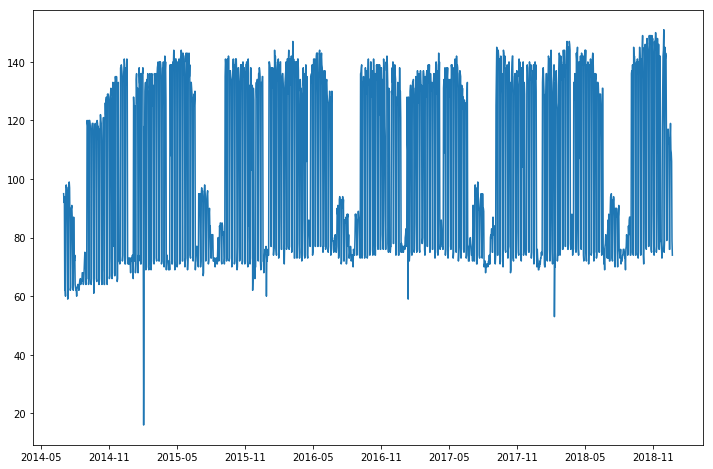

In [4]:
# Let's plot the data according the date occurrences
%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)
df['VIOLATION DATE'].dt.date.value_counts().sort_index().plot()

#### This graph shows an ever so slight increase in number of detections over the years.

### Are there any interesting patterns or specific outliers you find in the data?

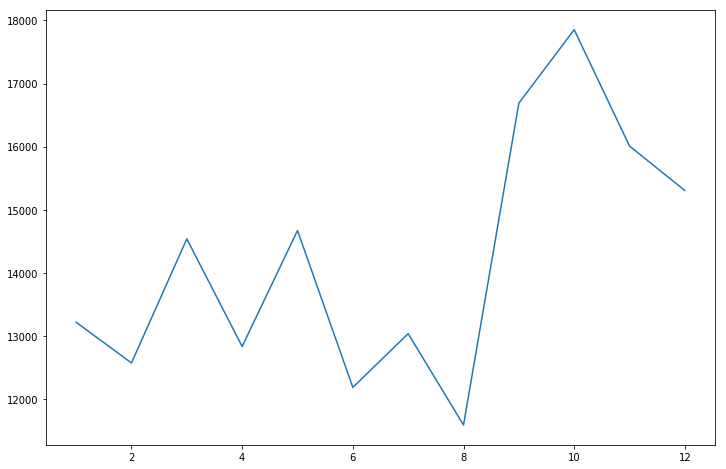

In [5]:
# When I was looking at the increase of cameras, I checked what would happen each month specifically:
df['VIOLATION DATE'].dt.month.value_counts().sort_index().plot()

#### This graph indicates that many of the violations tend to happen around October. Then the lowest number of violations usually occurs in August.

### Since I have never touched geographical graphs, I figured, why not try now?

In [22]:
import numpy as np
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

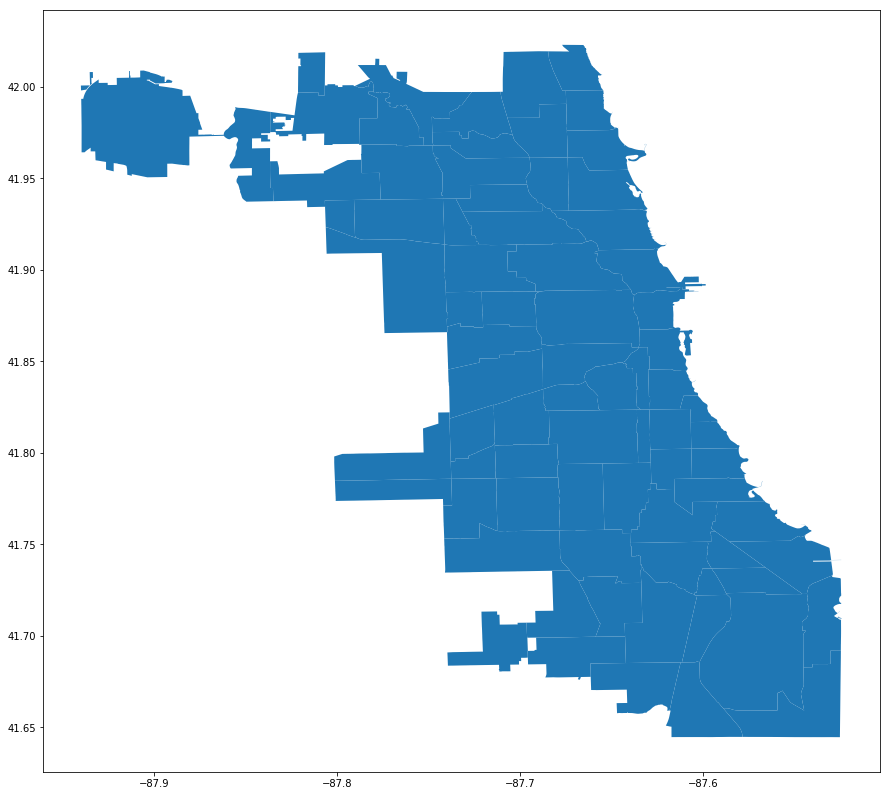

In [33]:
df.dropna()
chicago_map = gpd.read_file('geo_export_4942509a-4fa8-46a6-a4b5-fdc5a8c5e547.shp')
fig, ax = plt.subplots(figsize = (15,15))
chicago_map.plot(ax=ax)

In [36]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

In [38]:
geo_df = gpd.GeoDataFrame(df,
                         crs= crs,
                         geometry = geometry)
geo_df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
148,2912 W ROOSEVELT,CHI020,2014-10-16,25,1.157040e+06,1.894612e+06,41.866585,-87.698962,"(41.86658528313424, -87.69896237494204)",POINT (-87.69896237499999 41.866585283)
149,346 W 76th ST,CHI136,2014-10-16,4,1.175112e+06,1.854590e+06,41.756374,-87.633817,"(41.7563743554102, -87.6338165847716)",POINT (-87.63381658500001 41.756374355)
150,11153 S VINCENNES,CHI022,2014-10-16,6,1.167029e+06,1.830594e+06,41.690702,-87.664122,"(41.690701951255015, -87.66412238501842)",POINT (-87.664122385 41.690701951)
151,5454 W IRVING PARK,CHI050,2014-10-16,82,1.139043e+06,1.926097e+06,41.953330,-87.764267,"(41.95332954454448, -87.76426726425451)",POINT (-87.764267264 41.953329545)
152,5446 W FULLERTON,CHI042,2014-10-16,38,1.139460e+06,1.915458e+06,41.924128,-87.762994,"(41.92412849125162, -87.76299399881007)",POINT (-87.762993999 41.924128491)


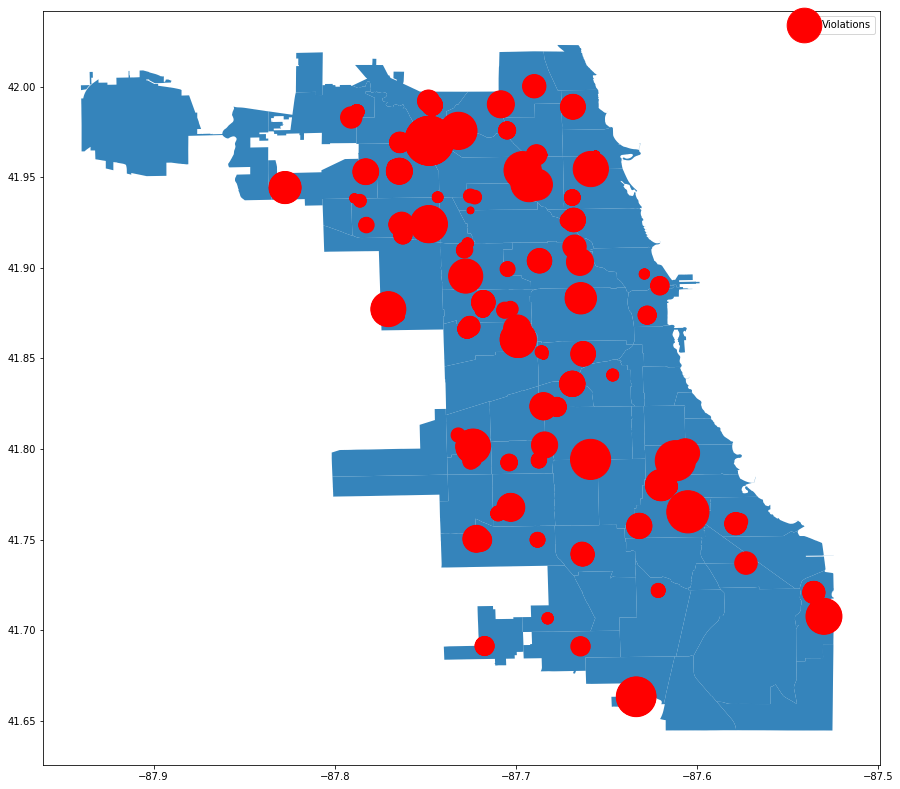

In [52]:
fig,ax = plt.subplots(figsize = (15,15))
chicago_map.plot(ax=ax, alpha=.9)
geo_df[geo_df['VIOLATIONS']>0].plot(ax = ax, markersize=geo_df['VIOLATIONS']*5, color = "red", marker = "o", label = "Violations")
plt.legend(prop={'size':10})

### After having tried three different packages (folium, matplotlib.basemaps, and geopandas) I have gotten one to finally work

#### So here we have some basic graph that has larger circles at locations where more violations are being recorded. If I were better at working with geopandas, I feel like I could get specific street names and addresses where these are happening more.
#### We can see however, that the further south of Chicago we go, the less violations are being recorded. It also seems like there is a spot where no violations are being recorded at all. That looks to be the East Roseland/ East Side area. There is a body of water in that region which takes up a chunk of it.
#### Because I am a filthy millenial who thinks the government is out to get me, I was curious about the wealth distribution among these areas of Chicago and see how it lines up.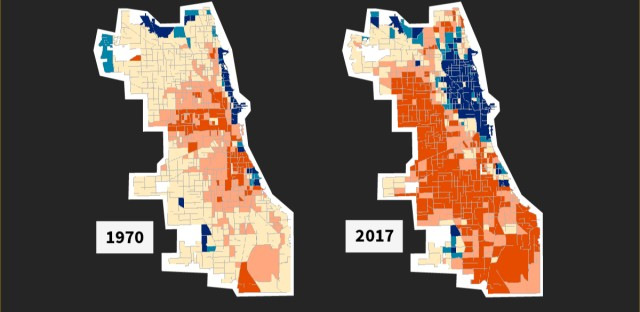
#### Luckily, there does not seem to be that big of a correlation between the Violations and the Income rates in the areas.

#### If I were more interested in this, I could possibly look up more information regarding general population distribution, as well as traffic density. I feel like thos would be major factors to consider when thinking about traffic violations.
